<h1>Analýza dát</h1>
Viac informácií v pdf práci.

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


Dáta som mal už pred začatím projektu rozdelené na trénovaciu a testovaciu vzorku. Preto som ich znovu načítal a mergeol za účelom analyzovania.

In [2]:
train_data = pd.read_csv('../input/train_data.csv')
test_data = pd.read_csv('../input/test_data.csv')

all_data = pd.concat([train_data, test_data])
X = all_data['job_description']
y = all_data['category']

Dataset obsahuje 50000 pracovných ponúk, ktoré sú rozdelené do 37 kategórií - oblasti práce. Cieľom projektu je nájsť dobrý model, ktorý by klasfifikoval pracovné ponuky na základe popisu práce do týchto tried.

In [3]:
X.shape, y.shape, len(set(y))

((50000,), (50000,), 37)

Zobrazenie zastúpenia jednotlivých tried - oblastí práce. Na grafe vidieť, že kategórie su nejednotne zastúpené, čo môže byť problém pre rôzne modely.

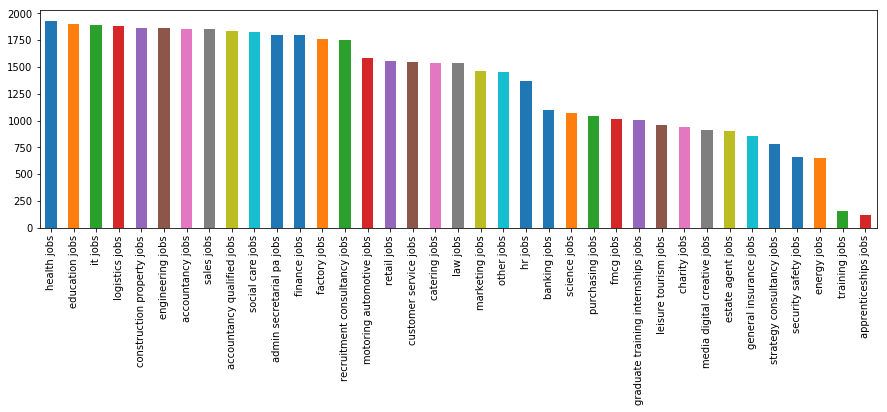

In [4]:
y.value_counts().plot(kind='bar', figsize=(15,4))

Graf nižšie znázorňuje, koľko slov majú popise práce. Priemerne má popis práce 297 slov, najmenej je to 17 slov a najviac 1069 slov.

min: 17 , max: 1069 , avg: 296.5426


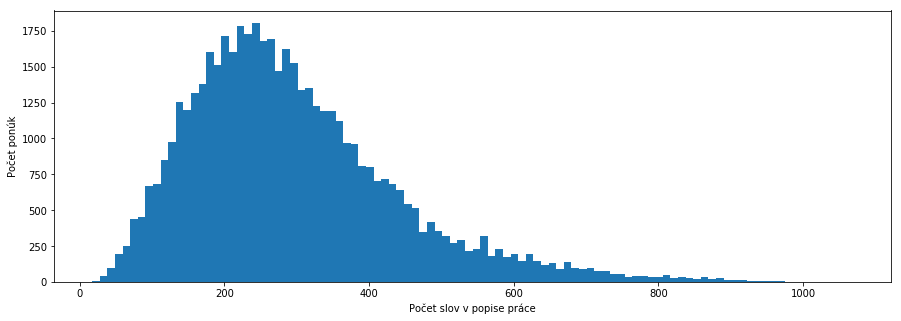

In [5]:
seq_lens = [len(row.split(' ')) for row in X]
print('min:', min(seq_lens),', max:', max(seq_lens),', avg:', np.mean(seq_lens))
plt.figure(figsize=(15,5))
plt.ylabel("Počet ponúk")
plt.xlabel("Počet slov v popise práce")

_ = plt.hist(seq_lens, bins=100)


Boxplot ukazuje, že až 90% popisov práce má do 600 znakov a až polovica popisov práce má cca 190-390 slov.

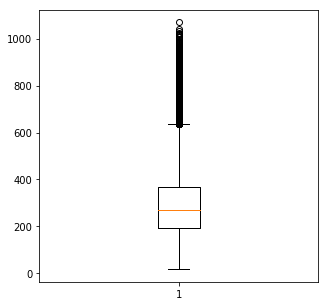

In [6]:
fig1, ax1 = plt.subplots(figsize=(5,5))
_ = ax1.boxplot(seq_lens)

Zostrojil som slovník slov a ukázalo sa, že v popise práce sa nacháza až 380805 unikátnych slov. Tiež je možné sa pozrieť na najčastejšie vyskytujúce sa slová. Na prvý pohľad vidno, že ide o tzv. stop slová, ktoré sa budu musieť vo fáze preprocesingu odstrániť.

In [ ]:
import operator

word_dict = dict()
for job in X:
    for word in job.split(' '):
        if word not in word_dict:
            word_dict[word] = 0
        else:
            word_dict[word] += 1
            
sorted_word_dict = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)

unique_words = set()
i = 0
for w in sorted_word_dict:
    unique_words.add(w[0])
    if i < 20:
        print(w[0], w[1])
    i += 1
print('unique word count:', len(unique_words))

In [ ]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = None).generate(str(X))

fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
